In [4]:
import layoutparser as lp
model = model = lp.Detectron2LayoutModel(
"./models/faster_rcnn_R_50_FPN_3x_publaynet.yaml",
"./models/faster_rcnn_R_50_FPN_3x_publaynet.pth",
# "./models/faster_rcnn_R_50_FPN_3x_publaynet.yaml",
# "./models/faster_rcnn_R_50_FPN_3x_publaynet.pth",
extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
label_map={0: "Text", 1: "Title", 2: "List", 3: "Table", 4: "Figure"},
)

# pip install --extra-index-url https://miropsota.github.io/torch_packages_builder detectron2==0.6+864913fpt2.1.2cu121

In [5]:
pdf_path = "./data/UniversScience/dossiers-pédagogiques/marc/Flop chef.pdf"
from pdf2image import convert_from_path
pages = convert_from_path(pdf_path)


In [6]:
out = model.detect(pages[11])


/home/erwan/anaconda3/envs/scienceinfuse/lib/python3.9/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


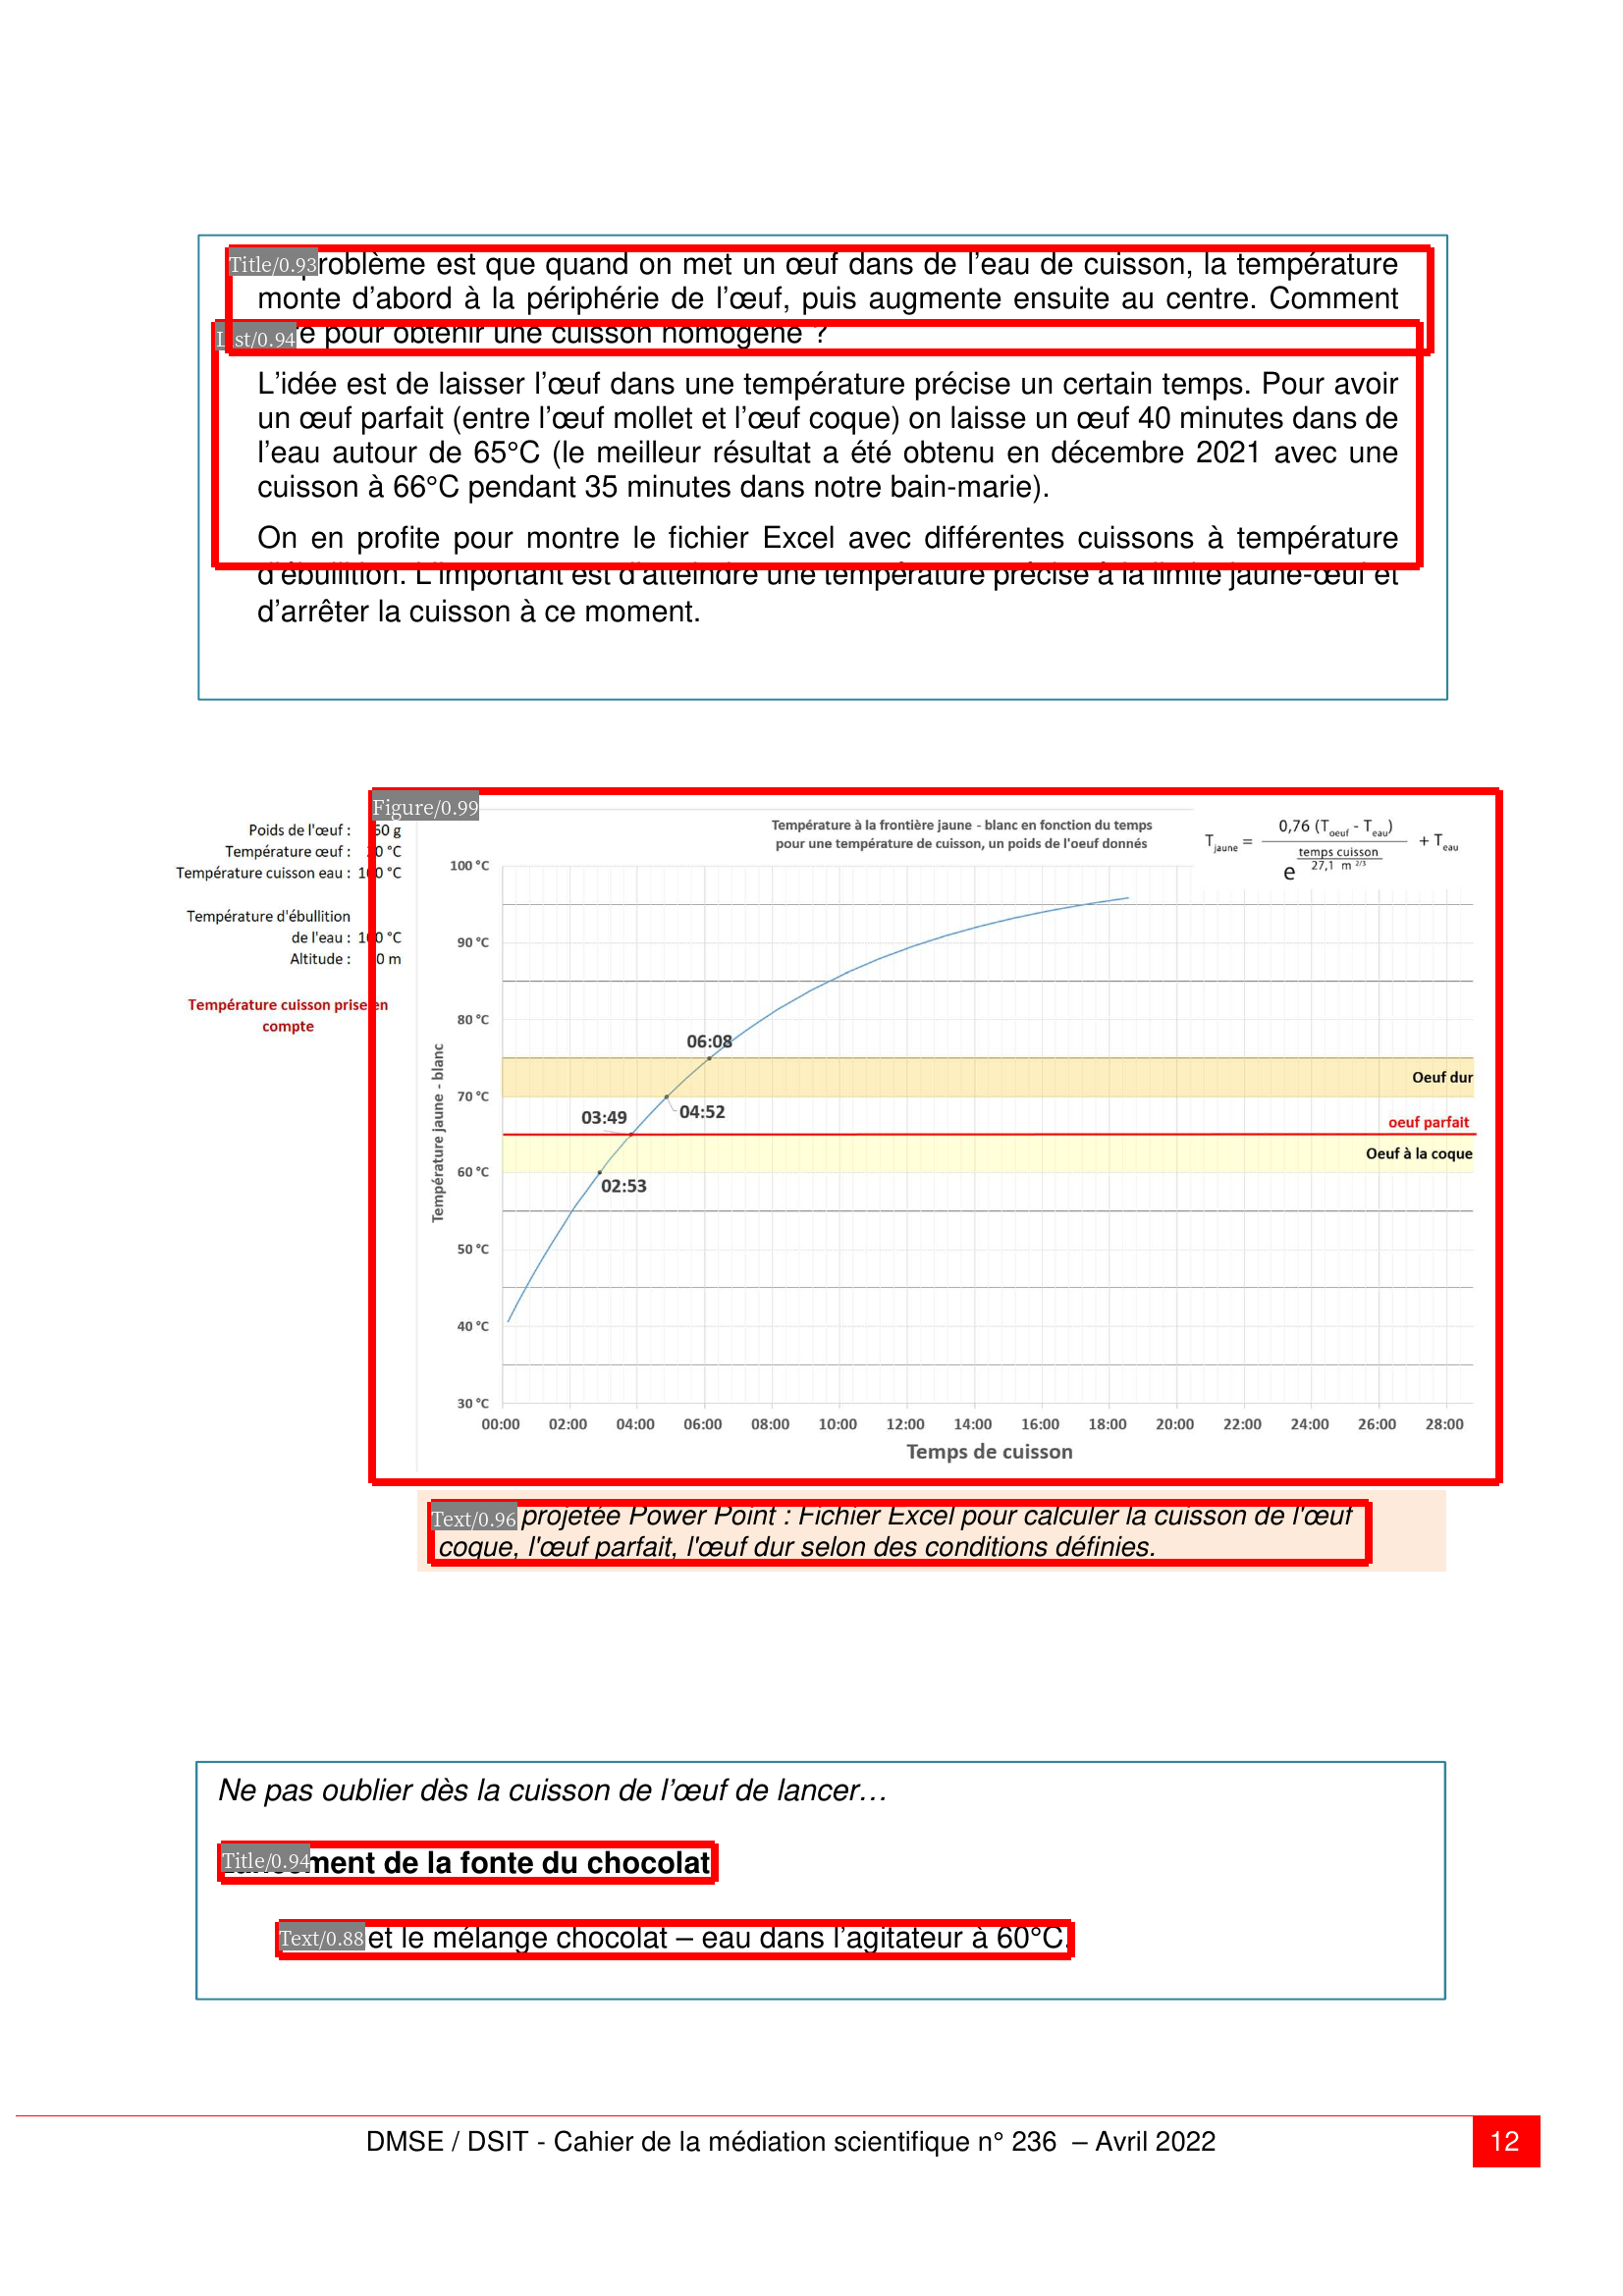

In [7]:
color_map = {
    'text':   'red',
    'title':  'blue',
    'list':   'green',
    'table':  'purple',
    'figure': 'pink',
}
image = pages[11]
lp.draw_box(image, 
              [b.set(id=f'{b.type}/{b.score:.2f}') for b in out],
              color_map=color_map,
              show_element_id=True, id_font_size=20, 
              id_text_background_color='grey',
              id_text_color='white')